In [275]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings as w
w.filterwarnings("ignore")
plt.style.use("ggplot")
sns.set_style("whitegrid")

In [11]:
df = pd.read_csv(r"C:\Users\areeb\Desktop\Data Science\Data Sets\Time Series data.csv")

In [12]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [13]:
df.shape

(9800, 18)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

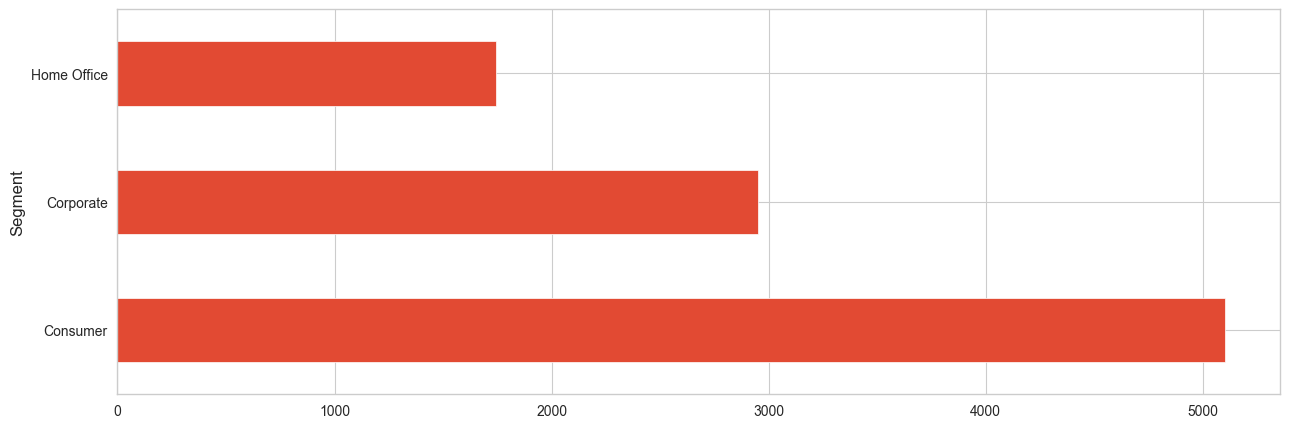

In [23]:
df["Segment"].value_counts().plot( kind = "barh" , figsize = (15,5))
plt.show()

In [31]:
segment_sales = df.groupby("Segment")["Sales"].sum().reset_index()
segment_sales

,Segment,Sales
0,Consumer,1.148061e+06
1,Corporate,6.884941e+05
2,Home Office,4.249822e+05


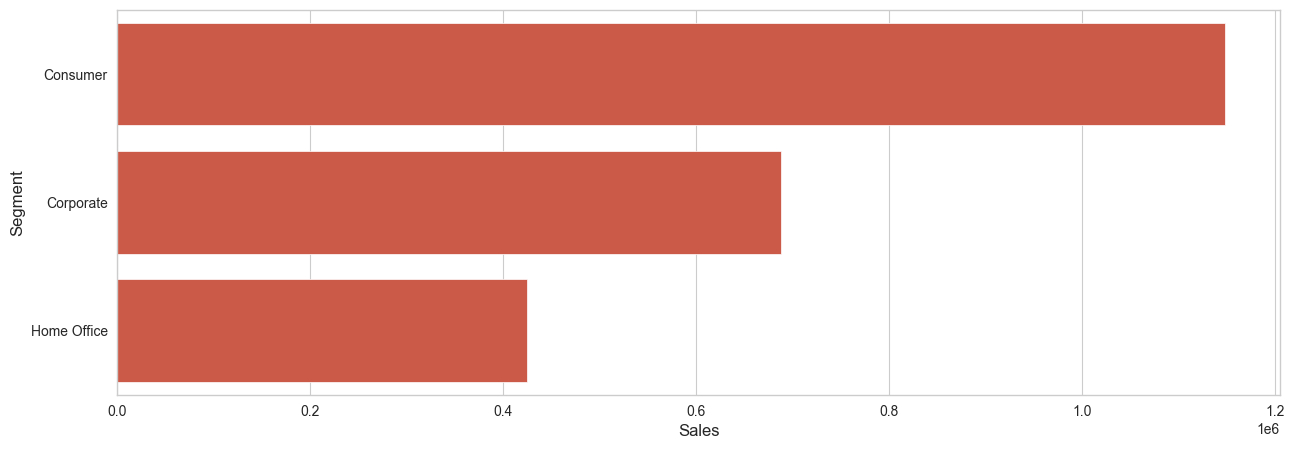

In [38]:
plt.figure( figsize = (15,5))
sns.barplot(data = segment_sales , y = "Segment", x = "Sales", orient = "h")
plt.show()

In [44]:
ship_mode_region = df.groupby(["Ship Mode", "Region"]).size().reset_index(name = "count")
ship_mode_region

,Ship Mode,Region,count
0,First Class,Central,292
1,First Class,East,470
2,First Class,South,232
3,First Class,West,507
4,Same Day,Central,118
5,Same Day,East,154
6,Same Day,South,83
7,Same Day,West,183
8,Second Class,Central,447
9,Second Class,East,521


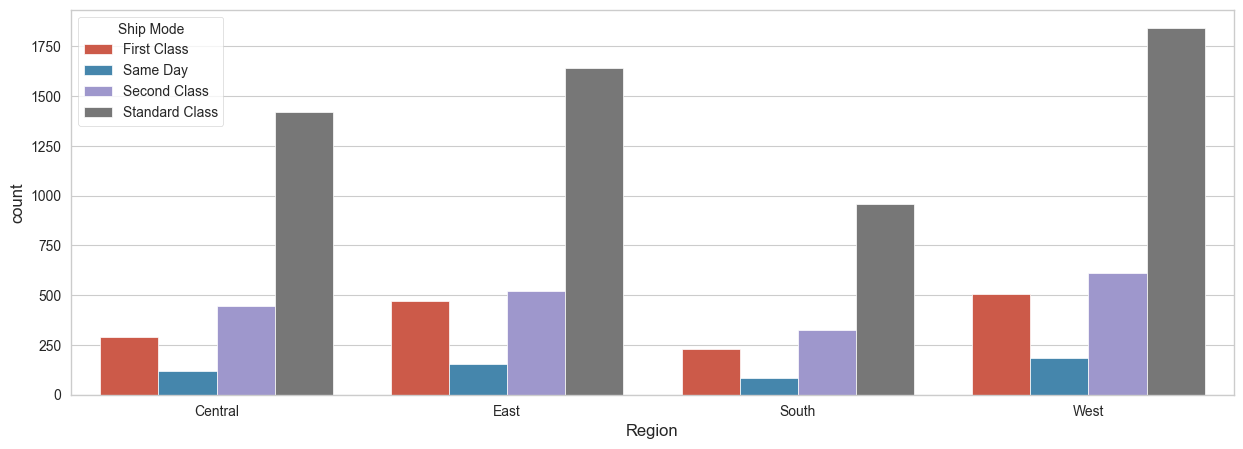

In [49]:
plt.figure( figsize = (15,5))
sns.barplot(data = ship_mode_region , x = "Region", y = "count", hue = "Ship Mode")
plt.show()

In [77]:
sales_over_region = df.pivot_table(index = "Region" , columns = "Ship Mode", values = "Sales", aggfunc = "sum")
sales_over_region

Ship Mode,First Class,Same Day,Second Class,Standard Class
Region,,,,
Central,58057.2978,20105.922,97605.7134,316877.9800
East,110436.6930,43316.464,115108.2580,400657.3110
South,49045.9160,21017.173,93434.5365,225653.8335
West,128032.3505,40779.480,143765.6715,397642.1825


In [78]:
sos = sales_over_region.unstack().reset_index(name = "sales")
sos

,Ship Mode,Region,sales
0,First Class,Central,58057.2978
1,First Class,East,110436.6930
2,First Class,South,49045.9160
3,First Class,West,128032.3505
4,Same Day,Central,20105.9220
5,Same Day,East,43316.4640
6,Same Day,South,21017.1730
7,Same Day,West,40779.4800
8,Second Class,Central,97605.7134
9,Second Class,East,115108.2580


<Axes: xlabel='Ship Mode', ylabel='sales'>

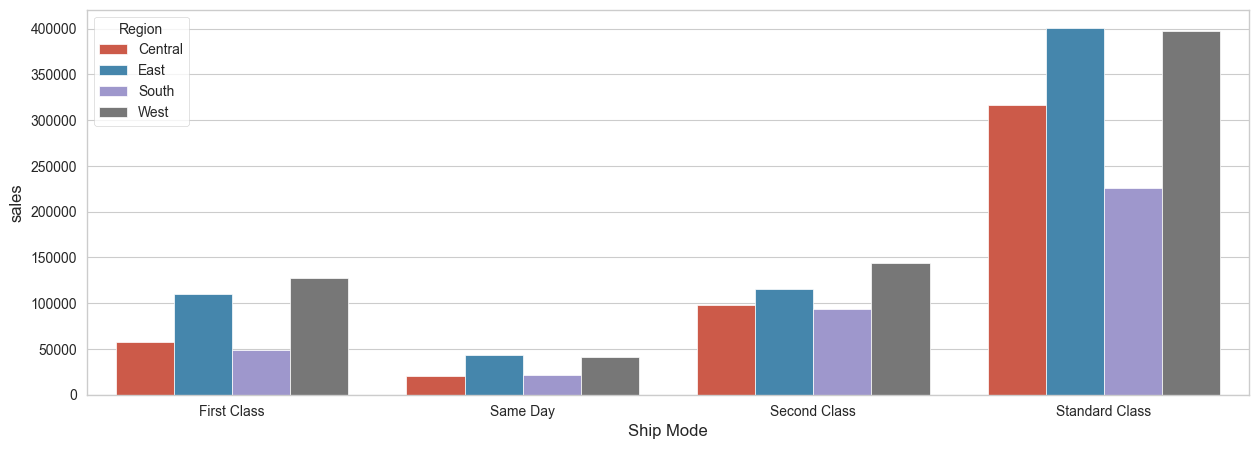

In [81]:
plt.figure( figsize = (15,5))

sns.barplot(data = sos , x = "Ship Mode", y = "sales", hue = "Region")

In [87]:
cs = df.groupby(["Category"])["Sales"].sum().reset_index()
cs

,Category,Sales
0,Furniture,728658.5757
1,Office Supplies,705422.3340
2,Technology,827455.8730


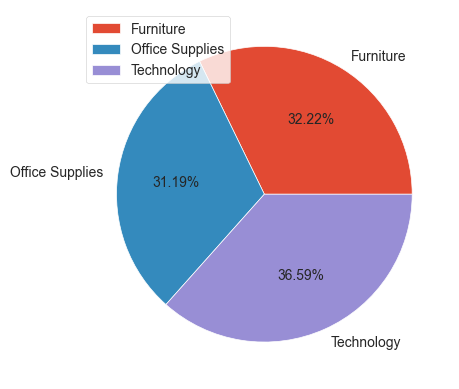

In [96]:
plt.pie( x = cs["Sales"], labels = cs["Category"], autopct = "%1.2f%%")
plt.legend(loc = "upper left")
plt.show()

In [99]:
scs = df.groupby("Sub-Category")["Sales"].sum().reset_index()

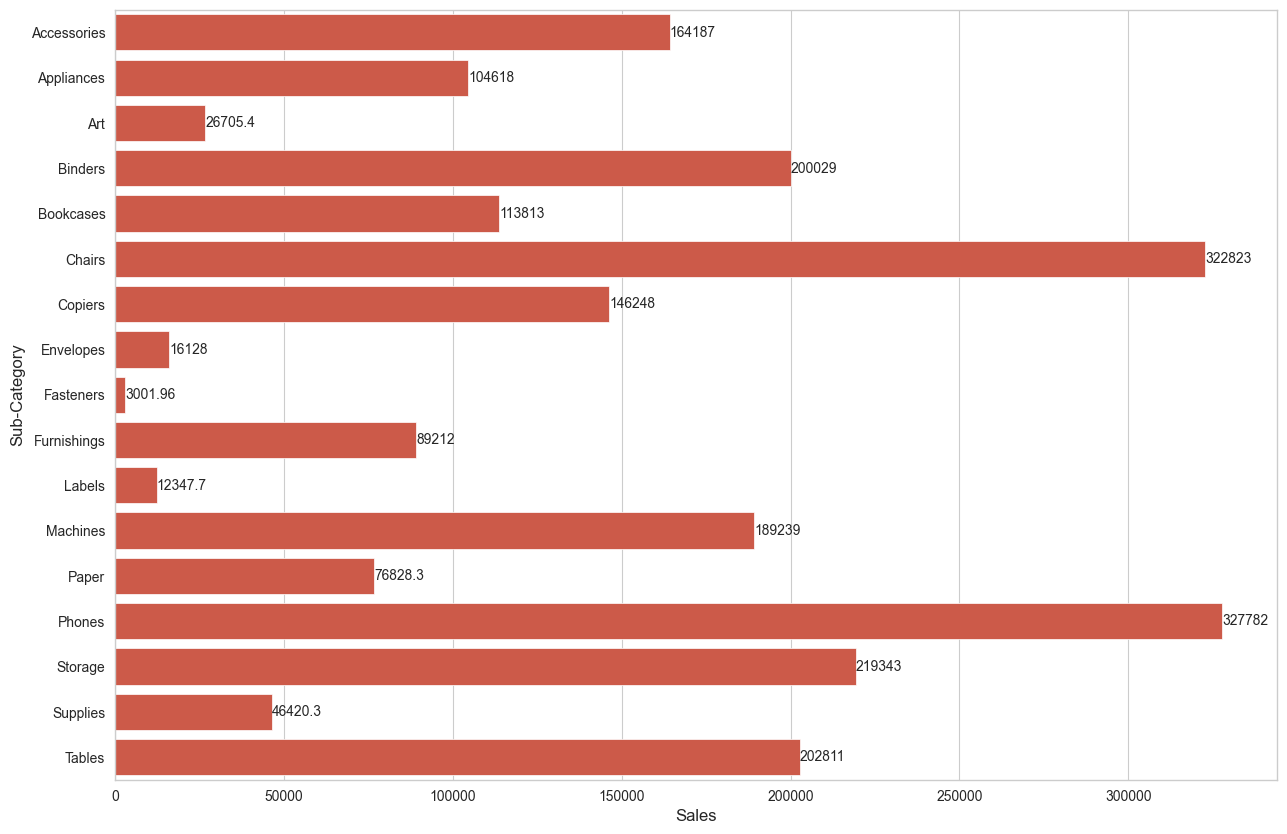

In [104]:
plt.figure( figsize = (15,10))

ax = sns.barplot( data = scs, y = "Sub-Category", x = "Sales", orient = "h")

for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [140]:
ccs = df.groupby("Customer ID").agg(
                              sales_count = ("Sales", "count"), 
                              sales_sum = ("Sales", "sum") 
                             ).reset_index().sort_values(
                                                         by = "sales_count", ascending = False).head()
ccs

,Customer ID,sales_count,sales_sum
787,WB-21850,35,6129.710
606,PP-18955,34,7252.608
482,MA-17560,34,4299.161
387,JL-15835,33,9576.343
147,CK-12205,32,3154.855


In [122]:
df["Order Date"] = pd.to_datetime( df["Order Date"] , format = "%d/%m/%Y")

In [235]:
yearly_sales = df.groupby(pd.Grouper(key = "Order Date", freq = "Y"))["Sales"].sum().reset_index()
yearly_sales

,Order Date,Sales
0,2015-12-31,479856.2081
1,2016-12-31,459436.0054
2,2017-12-31,600192.5500
3,2018-12-31,722052.0192


In [168]:
monthly_sales = df.groupby(pd.Grouper(key = "Order Date", freq = "M"))["Sales"].sum().reset_index()
monthly_sales.head()

,Order Date,Sales
0,2015-01-31,14205.707
1,2015-02-28,4519.892
2,2015-03-31,55205.797
3,2015-04-30,27906.855
4,2015-05-31,23644.303


In [192]:
quarter_sales = df.groupby(pd.Grouper(key = "Order Date", freq = "Q"))["Sales"].sum().reset_index()
quarter_sales.head()

,Order Date,Sales
0,2015-03-31,73931.3960
1,2015-06-30,85874.0936
2,2015-09-30,142522.6063
3,2015-12-31,177528.1122
4,2016-03-31,62357.6870


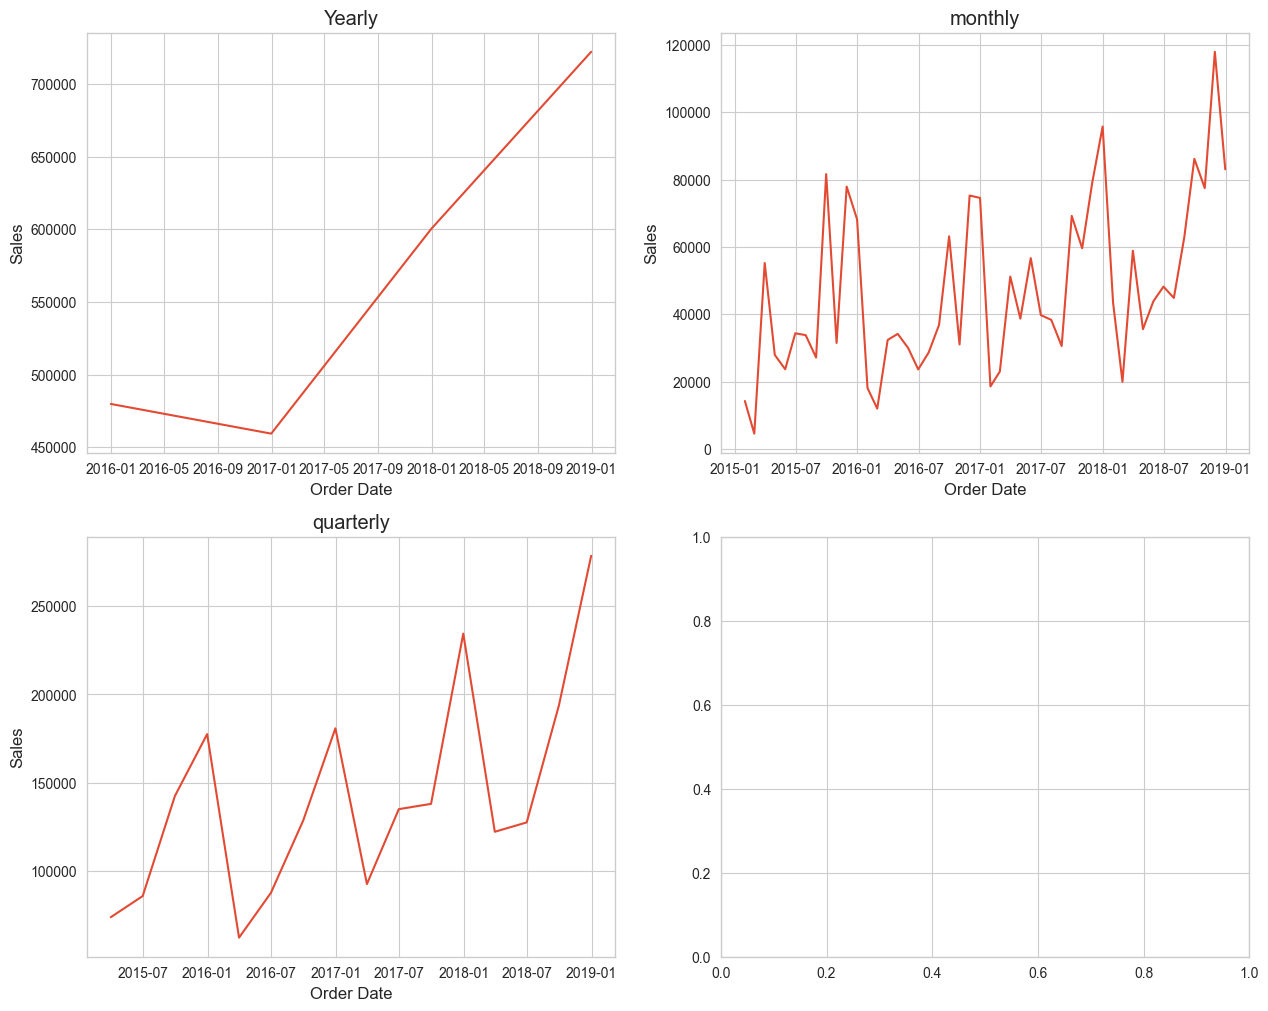

In [237]:
fig , (ax1 , ax2) = plt.subplots(2,2 , figsize = (15,12))

ax1[0] = sns.lineplot( data = yearly_sales , x = "Order Date", y = "Sales", ax = ax1[0])
ax1[0].set_title("Yearly")

ax1[1] = sns.lineplot( data = monthly_sales , x = "Order Date", y = "Sales", ax = ax1[1])
ax1[1].set_title("monthly")

ax2[0] = ax1[1] = sns.lineplot( data = quarter_sales , x = "Order Date", y = "Sales", ax = ax2[0])
ax2[0].set_title("quarterly")

plt.show()

In [197]:
rs = df.groupby('Region')["Sales"].sum().reset_index()
rs

,Region,Sales
0,Central,492646.9132
1,East,669518.7260
2,South,389151.4590
3,West,710219.6845


In [200]:
ss = df.groupby('Ship Mode')["Sales"].sum().reset_index()
ss

,Ship Mode,Sales
0,First Class,3.455723e+05
1,Same Day,1.252190e+05
2,Second Class,4.499142e+05
3,Standard Class,1.340831e+06


In [203]:
cs = df.groupby("Segment")["Sales"].sum().reset_index()
cs

,Segment,Sales
0,Consumer,1.148061e+06
1,Corporate,6.884941e+05
2,Home Office,4.249822e+05


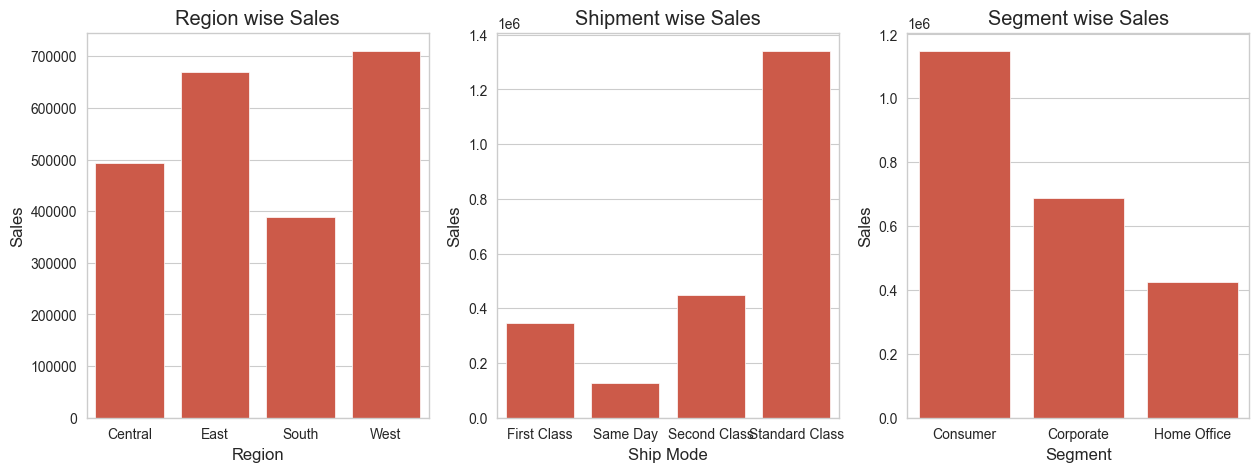

In [220]:
fig , ax = plt.subplots(1,3, figsize = (15,5))

ax[0] = sns.barplot(data = rs , x = "Region", y = "Sales", ax = ax[0])
ax[0].set_title("Region wise Sales")

ax[1] =  sns.barplot(data = ss , x = "Ship Mode", y = "Sales", ax = ax[1])
ax[1].set_title("Shipment wise Sales")

ax[2] =  sns.barplot(data = cs , x = "Segment", y = "Sales", ax = ax[2])
ax[2].set_title("Segment wise Sales")

plt.show()

In [244]:
yearly_s_count = df.groupby(pd.Grouper(key= "Order Date", freq = "Y")) ["Sales"].count().reset_index(name = "Sales_Count")
yearly_s_count.head()

,Order Date,Sales_Count
0,2015-12-31,1953
1,2016-12-31,2055
2,2017-12-31,2534
3,2018-12-31,3258


In [236]:
yearly_sales

,Order Date,Sales
0,2015-12-31,479856.2081
1,2016-12-31,459436.0054
2,2017-12-31,600192.5500
3,2018-12-31,722052.0192


In [263]:
color_p = sns.color_palette()
color_p

[(0.8862745098039215, 0.2901960784313726, 0.2),
 (0.20392156862745098, 0.5411764705882353, 0.7411764705882353),
 (0.596078431372549, 0.5568627450980392, 0.8352941176470589),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.984313725490196, 0.7568627450980392, 0.3686274509803922),
 (0.5568627450980392, 0.7294117647058823, 0.25882352941176473),
 (1.0, 0.7098039215686275, 0.7215686274509804)]

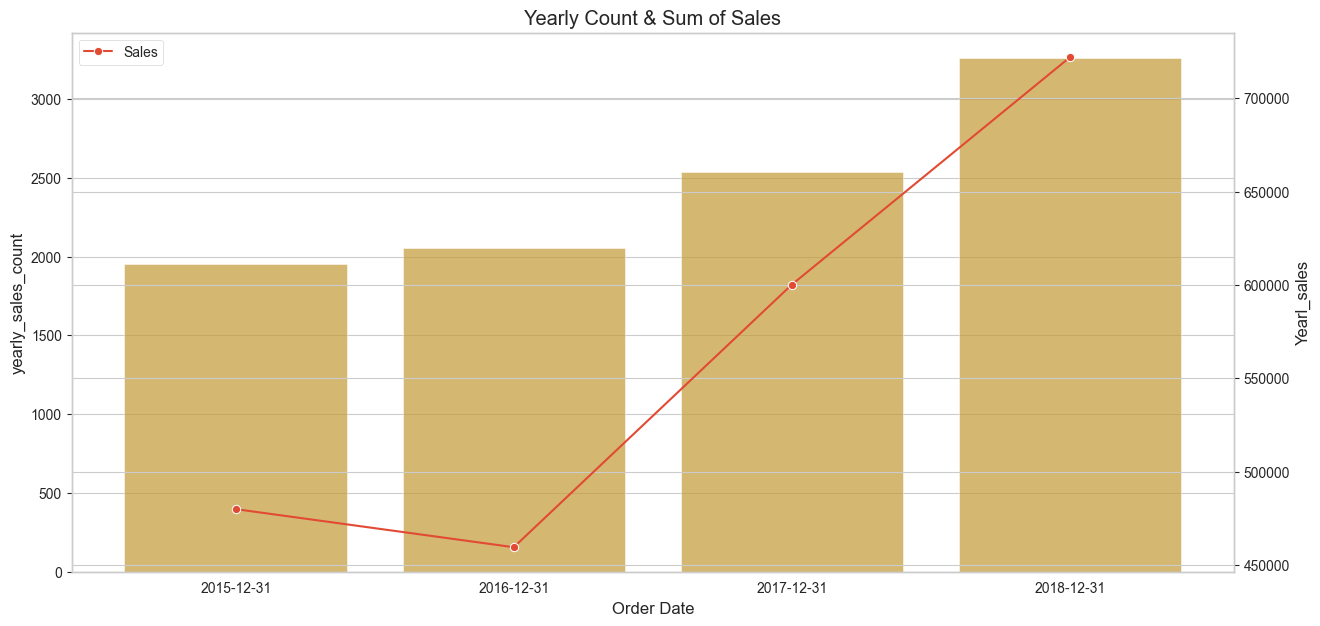

In [274]:

fig , ax1 = plt.subplots( figsize = (15,7))

sns.barplot(data = yearly_s_count , x = "Order Date", y = "Sales_Count" , ax = ax1, color = "goldenrod" , alpha = 0.7)
ax1.set_ylabel("yearly_sales_count")

ax2 = ax1.twinx()

sns.lineplot(data = yearly_sales , x = range(len(yearly_sales)), y = "Sales", ax = ax2 , color = color_p[0] , marker = "o", label = "Sales") 
ax2.set_ylabel("Yearl_sales")

plt.legend(loc = "upper left")
plt.title("Yearly Count & Sum of Sales")
plt.show()